## The process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.

In [ ]:
#https://github.com/cjhutto/vaderSentiment

# Sentiment analysis using VADER

This notebook demostrates a workflow of using VADER Sentiment library for automatic sentiment classification. The task is to run VADER Sentiment on a datasetset including reviews from employees of 6 giant companies and evaluate which company had the most positive reviews from thier employees.

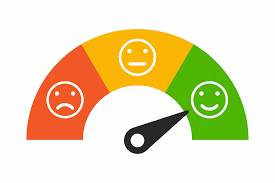

In [ ]:
!pip install -q vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


## Import relevant libraries

In [6]:
import pandas as pd
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
tqdm.pandas()
from matplotlib import pyplot as plt

#help(SentimentIntensityAnalyzer)

## Read in and Explore dataset

In [17]:
data=pd.read_csv('employee_reviews.csv')

In [ ]:
data.head(2)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...


In [ ]:

print(f"The size of the data is  {data.shape}")
print(f"The individual company information is \n {data.company.value_counts()} ")
print(data.company.unique())

The size of the data is  (67529, 17)
The individual company information is 
 company
amazon       26430
microsoft    17930
apple        12950
google        7819
facebook      1590
netflix        810
Name: count, dtype: int64 
['google' 'amazon' 'facebook' 'netflix' 'apple' 'microsoft']


## Preprocessing and cleaning

## Sentiment Analysis

In [11]:
help(SentimentIntensityAnalyzer)

Help on class SentimentIntensityAnalyzer in module vaderSentiment.vaderSentiment:

class SentimentIntensityAnalyzer(builtins.object)
 |  SentimentIntensityAnalyzer(lexicon_file='vader_lexicon.txt', emoji_lexicon='emoji_utf8_lexicon.txt')
 |  
 |  Give a sentiment intensity score to sentences.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, lexicon_file='vader_lexicon.txt', emoji_lexicon='emoji_utf8_lexicon.txt')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  make_emoji_dict(self)
 |      Convert emoji lexicon file to a dictionary
 |  
 |  make_lex_dict(self)
 |      Convert lexicon file to a dictionary
 |  
 |  polarity_scores(self, text)
 |      Return a float for sentiment strength based on the input text.
 |      Positive values are positive valence, negative value are negative
 |      valence.
 |  
 |  score_valence(self, sentiments, text)
 |  
 |  sentiment_valence(self, valence, sentitext, item, i, sentiments)
 |  
 |  ---------------------

In [13]:
sent_analyzer = SentimentIntensityAnalyzer() #create a sentiment analysis object



In [20]:
sent_analyzer.polarity_scores('I am happy')

{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

In [21]:
happy_score=sent_analyzer.polarity_scores('I am happy')['compound']
print(happy_score)

0.5719


{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

In [22]:
sad_score=sent_analyzer.polarity_scores('The place  was really bad everything was awful')['compound']
print(sad_score)

-0.7778


In [24]:
def vadar_sentiment(text):
    """ Calculate and return the nltk vadar (lexicon method) sentiment """
    return sent_analyzer.polarity_scores(text)['compound']

In [25]:

# create new column for vadar compound sentiment score
data['summary']=data['summary'].astype(str)
data['vadar compound'] = data['summary'].progress_apply(vadar_sentiment)


100%|██████████| 67529/67529 [00:03<00:00, 21308.15it/s]


In [26]:
data.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,vadar compound
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...,0.6369
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...,0.0000
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...,0.8689
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5,498,https://www.glassdoor.com/Reviews/Google-Revie...,0.4601
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5,49,https://www.glassdoor.com/Reviews/Google-Revie...,0.6597


In [27]:


def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1)
        or neutral (0) based on given thresholds """
    if sentiment <= neg_threshold:
        label = 'negative'
    elif sentiment >= pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

# new col with vadar sentiment label based on vadar compound score
data['vadar sentiment'] = data['vadar compound'].apply(categorise_sentiment)


In [28]:
data.head(10)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,vadar compound,vadar sentiment
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...,0.6369,positive
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...,0.0000,neutral
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...,0.8689,positive
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5,498,https://www.glassdoor.com/Reviews/Google-Revie...,0.4601,positive
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5,49,https://www.glassdoor.com/Reviews/Google-Revie...,0.6597,positive
5,6,google,"Mountain View, CA","Dec 9, 2018",Former Employee - SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,none,5,4,4,4,5,4,1,https://www.glassdoor.com/Reviews/Google-Revie...,0.5473,positive
6,7,google,"New York, NY","Dec 11, 2018",Current Employee - Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,none,5,5,4,4,5,4,0,https://www.glassdoor.com/Reviews/Google-Revie...,0.0000,neutral
7,8,google,none,"Dec 11, 2018",Former Employee - Anonymous Employee,great place to work and progress,"work culture, benefits, growth, people,",No cons that i can think of,none,5,5,5,5,5,5,0,https://www.glassdoor.com/Reviews/Google-Revie...,0.7845,positive
8,9,google,"New York, NY","Dec 10, 2018",Current Employee - Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,none,5,5,5,5,5,5,0,https://www.glassdoor.com/Reviews/Google-Revie...,0.0000,neutral
9,10,google,none,"Dec 9, 2018",Current Employee - Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,none,5,5,5,5,5,5,0,https://www.glassdoor.com/Reviews/Google-Revie...,0.0000,neutral


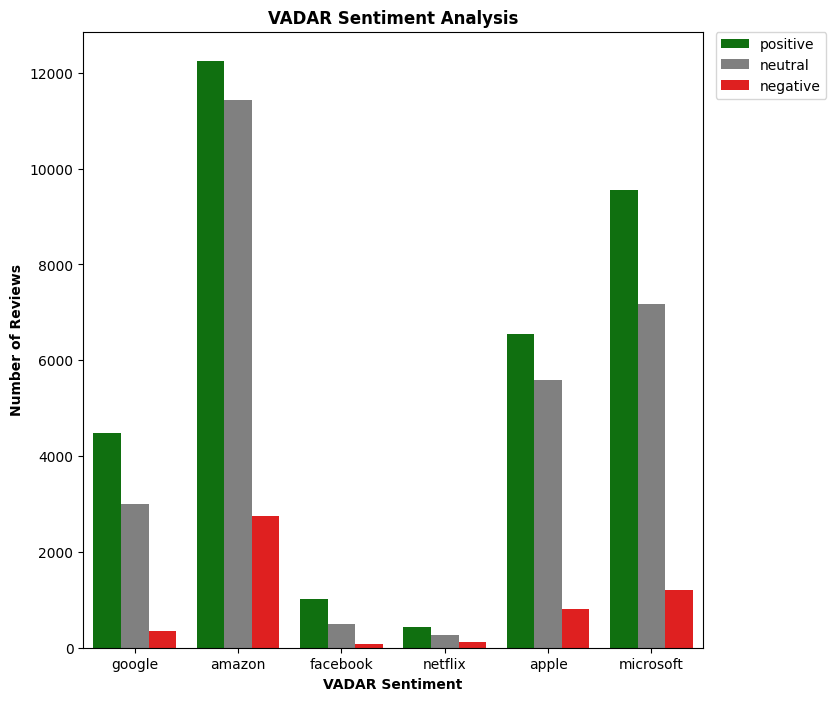

In [ ]:
# plot distribution of article sentiments for each company

palette ={"positive": "green", "neutral": "grey", "negative": "red"}
plt.figure(figsize=(8,8))
sns.countplot(x='company', data=data, hue='vadar sentiment', palette=palette)
plt.title('VADAR Sentiment Analysis', weight='bold')
plt.ylabel('Number of Reviews', fontsize=10, weight='bold')
plt.xlabel('VADAR Sentiment', fontsize=10, weight='bold')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0.0)
plt.show()

## Which company had the most positive review?

In [ ]:
# Filter out only positive reviews
positive_reviews = data[data['vadar sentiment'] == 'positive']

#Count positive reviews per company
positive_count = positive_reviews['company'].value_counts()
print(positive_count)
# Count total reviews per company
total_count = data['company'].value_counts()

# Calculate the ratio of positive reviews
positive_ratio = positive_count / total_count
print(positive_ratio)
# Find the company with the highest ratio
highest_positive_ratio_company = positive_ratio.idxmax()

print(highest_positive_ratio_company)


company
amazon       12247
microsoft     9563
apple         6558
google        4476
facebook      1016
netflix        426
Name: count, dtype: int64
company
amazon       0.463375
microsoft    0.533352
apple        0.506409
google       0.572452
facebook     0.638994
netflix      0.525926
Name: count, dtype: float64
facebook


As we can see from the plot Facebook seems to have the most positive review when the proportions are normalized.